In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from dataset import Dataset

#I_scale = 10.0
I_scale = 1.0
dataset = Dataset(scale=I_scale)

In [25]:
print(len(dataset.patches))
print(np.std(dataset.patches))
print(np.mean(dataset.patches))

2375
2.1438892
-0.0016897094


In [26]:
#k1 = 0.5
#k2 = 1.0

#k1 = 0.0005 # rの学習率
#k2 = 0.0001 # Uの学習率

#k1 = 0.0005 # rの学習率
#k2 = 0.001 # Uの学習率

k1 = 0.0005 # rの学習率
k2 = 0.005 # Uの学習率

U_scale = 7.0

sigma_sq    = 1.0 # Iの生成観測分布の分散
sigma_sq_td = 10.0 # rの生成観測分布の分散
alpha1      = 1.0 # rの事前分布の精度パラメータ (分散の逆数)
alpha2      = 0.05 # r_tdの事前分布の精度パラメータ (分散=20.0, 標準偏差4.5)
lambd       = 0.02 # Uの事前分布の精度パラメータ　(分散=50.0, 標準偏差7.1)

iteration = 20

Us = (np.random.rand(3,256,32)-0.5) * U_scale
rs = np.zeros([3, 32], dtype=np.float32)

results = []
errors = []

patch_size = len(dataset.patches) # 2375

for k in range(patch_size):
    rs = np.zeros([3, 32], dtype=np.float32)
    
    for i in range(iteration):
        for j in range(3):
            I = dataset.get_image(k, j)
            r = rs[j]
            U = Us[j]
            Ur = U.dot(r)
            error = I - Ur
            dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
            dU = (k2 / sigma_sq) * np.outer(error, r) - k2 * lambd * U
            rs[j] += dr
            Us[j] += dU
    
    if k % 100 == 0:
        print("us mean={} std={}".format(np.mean(Us[0]), np.std(Us[0])))                                    
        print("rs mean={} std={}".format(np.mean(rs), np.std(rs)))
    
    if k % 40 == 0:
        k2 = k2 / 1.015
    #    print("k2={}".format(k2))        
        

us mean=0.012005598785834235 std=2.002280045160057
rs mean=-1.6241605507490146e-18 std=4.047546938454674e-17
us mean=0.009866089586301738 std=1.6479916490164872
rs mean=0.0001587852748343721 std=0.001276712166145444
us mean=0.008135708003872404 std=1.3657237402827656
rs mean=0.001023142016492784 std=0.010397164151072502
us mean=0.00673592647660367 std=1.1399491507254764
rs mean=0.00024343263066839427 std=0.0122720617800951
us mean=0.005548982354503141 std=0.9575850550058328
rs mean=-2.3448595472165864e-18 std=7.350354054670296e-17
us mean=0.004673048353342077 std=0.80980220752013
rs mean=-6.68564680381678e-05 std=0.005850155837833881
us mean=0.004053472374784681 std=0.6949325550402924
rs mean=0.006007262039929628 std=0.11744318157434464
us mean=-0.0009050607991976899 std=0.6359748926893154
rs mean=-0.004999063443392515 std=0.11405293643474579
us mean=-0.003499840183905289 std=0.5966461795369454
rs mean=-0.009315419010818005 std=0.08191749453544617
us mean=-0.001333749727900789 std=0.55

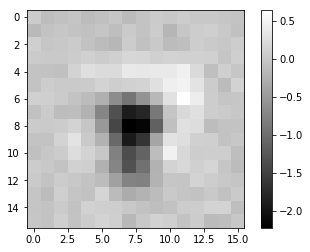

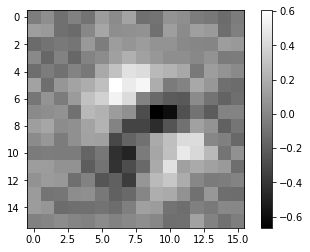

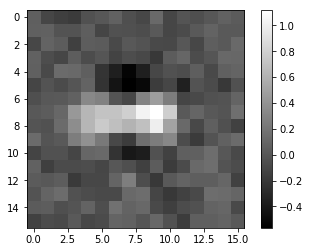

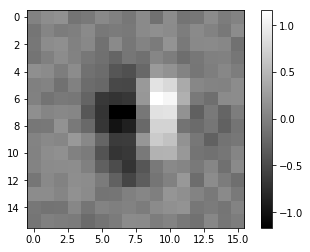

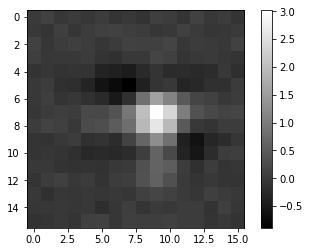

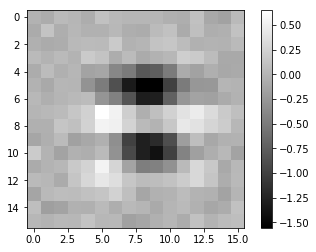

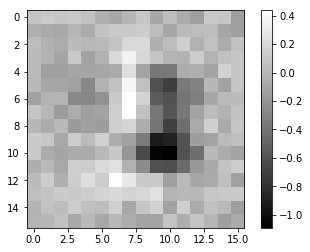

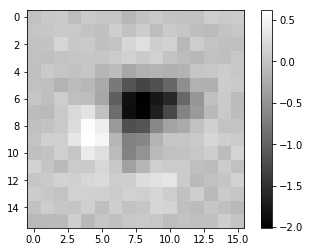

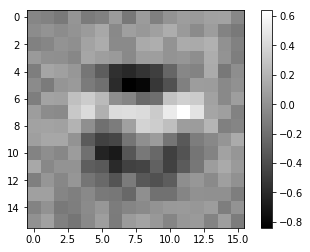

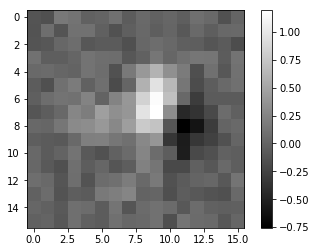

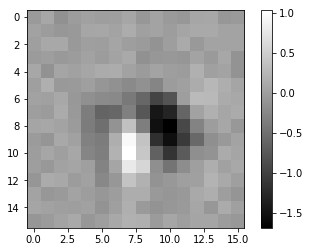

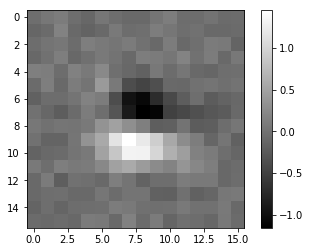

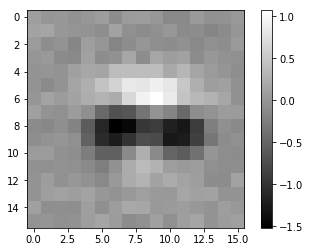

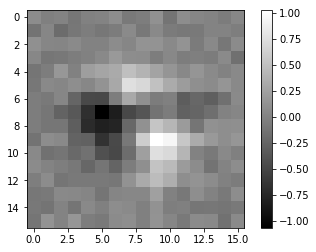

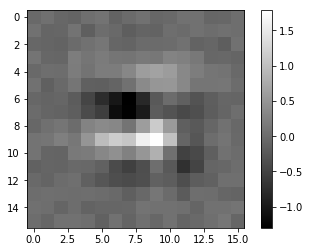

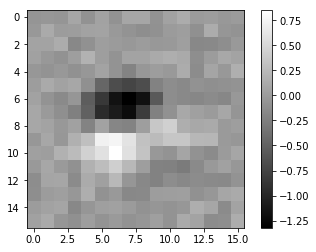

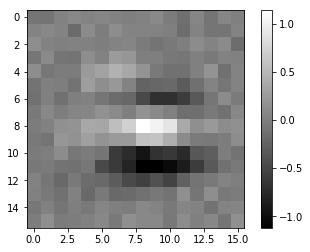

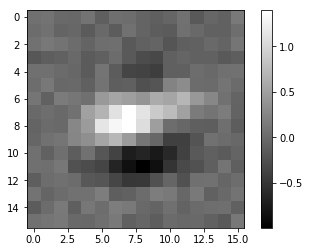

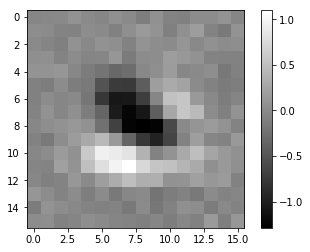

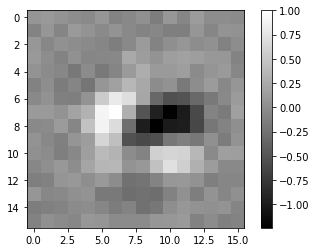

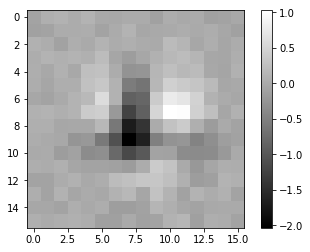

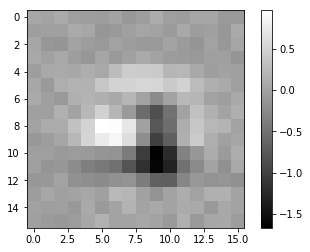

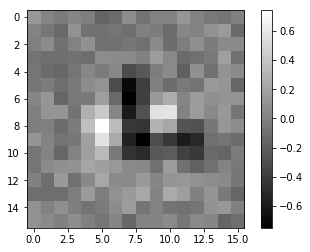

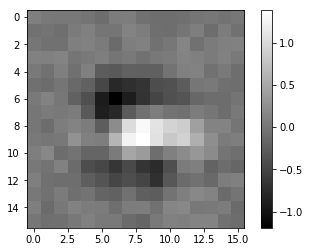

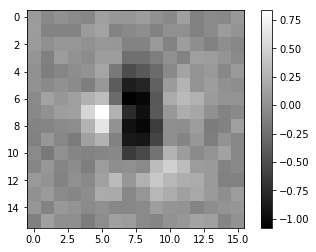

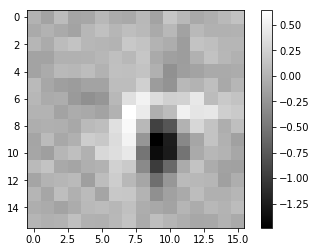

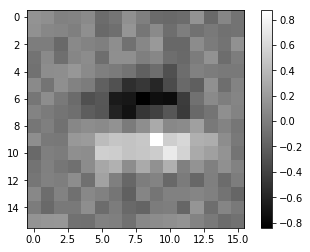

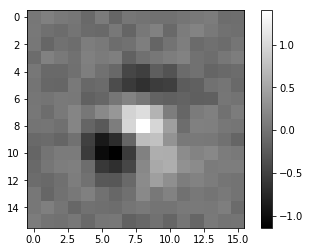

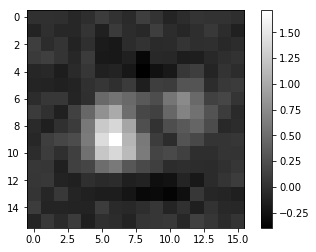

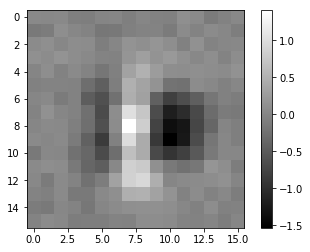

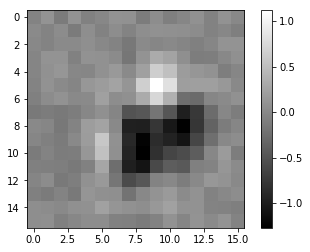

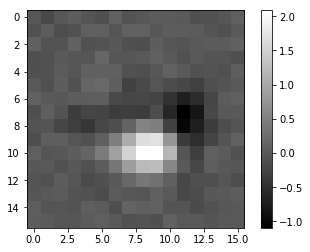

In [27]:
for i in range(32):
    u = Us[1][:,i].reshape(16,16)
    plt.figure()
    plt.imshow(u, cmap='gray')
    plt.colorbar()
    plt.show()

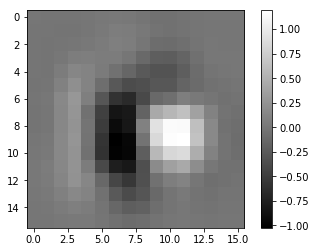

In [23]:
I = dataset.get_image(505, 0)

plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

## 再構成の確認

[ 0.02700165  0.00426887 -0.01248806 -0.0156567  -0.00796975 -0.00678368
  0.01004769 -0.01513218 -0.03337486 -0.04203885  0.02696352 -0.04353521
 -0.04010903 -0.02523022 -0.03012716  0.04279372 -0.01767526 -0.00565708
 -0.01662728 -0.00418677  0.00764487 -0.02957953  0.00646687 -0.01634188
 -0.02608249 -0.01984372 -0.01819251  0.00395562  0.02710197 -0.00893749
 -0.01706406  0.02801721]


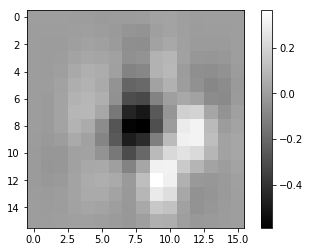

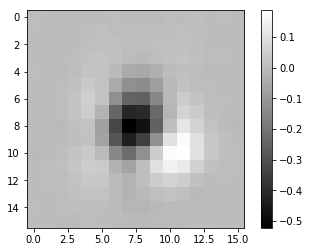

In [33]:
image_index = 506
I = dataset.get_image(image_index, 0)
rs = np.zeros([3, 32], dtype=np.float32)

for i in range(30):
    r = rs[j]
    U = Us[j]
    Ur = U.dot(r)
    error = I - Ur
    dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
    rs[j] += dr

U = Us[j]
r = rs[j]

print(r)

I_rec = U.dot(r)

plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(I_rec.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()